# Multiple Linear Regression Sklearn

# Dataset from ETL notebook

In [17]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv("../Output/house_crime.csv")
df.head()

,Unnamed: 0,suburb,rooms,type,price,bathroom,car,month,year,average_incidents
0,0,Abbotsford,2,h,1480000.0,1.0,1.0,12,2016,1286
1,1,Abbotsford,2,h,1035000.0,1.0,0.0,2,2016,1286
2,2,Abbotsford,3,h,1465000.0,2.0,0.0,3,2017,1286
3,3,Abbotsford,3,h,850000.0,2.0,1.0,3,2017,1286
4,4,Abbotsford,4,h,1600000.0,1.0,2.0,6,2016,1286


In [19]:
df = df.loc[:, ['rooms', 'price', 'bathroom', 'car']]
df.head()

,rooms,price,bathroom,car
0,2,1480000.0,1.0,1.0
1,2,1035000.0,1.0,0.0
2,3,1465000.0,2.0,0.0
3,3,850000.0,2.0,1.0
4,4,1600000.0,1.0,2.0


# Model

In [20]:
# Assign the data to X and y
X = df[["rooms", "car", 'bathroom']]
y = df["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(20423, 3) (20423, 1)


In [21]:
y

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 730000.],
       [ 615000.],
       [ 640000.]])

In [22]:
X.head()

,rooms,car,bathroom
0,2,1.0,1.0
1,2,0.0,1.0
2,3,0.0,2.0
3,3,1.0,2.0
4,4,2.0,1.0


In [23]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [27]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.23676110037721276
Testing Score: 0.2544422024142612


Text(0.5, 1.0, 'Residual Plot')

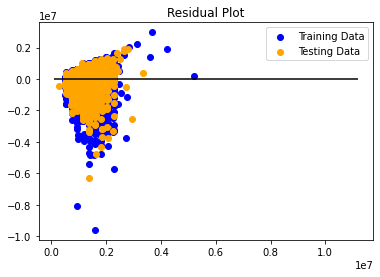

In [28]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [29]:
import joblib

In [30]:
joblib_file = "simple_LR.joblib"  
joblib.dump(model, joblib_file)

['simple_LR.joblib']